In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
data = pd.get_dummies(data,columns=['Sex','ChestPainType','ExerciseAngina','ST_Slope','RestingECG'])
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0


In [6]:
fc = data.pop('HeartDisease')
data.insert(len(list(data)), 'HeartDisease', fc)
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,1,0,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,1


In [7]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,1,0,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train

array([[ 1.75354017,  0.40398537, -1.85006457, ..., -0.49403218,
         0.80587729, -0.49616526],
       [-0.81787111, -0.95050604, -1.85006457, ..., -0.49403218,
         0.80587729, -0.49616526],
       [ 1.21782949,  1.48757849,  1.49894114, ...,  2.02415963,
        -1.24088371, -0.49616526],
       ...,
       [ 0.3606924 , -0.24617051,  0.9686819 , ...,  2.02415963,
        -1.24088371, -0.49616526],
       [ 1.11068735,  0.07890743,  0.6895981 , ..., -0.49403218,
         0.80587729, -0.49616526],
       [-0.71072897, -1.32976364,  0.41051429, ..., -0.49403218,
         0.80587729, -0.49616526]])

In [11]:
X_test

array([[ 0.14640812, -0.95050604, -1.85006457, ..., -0.49403218,
         0.80587729, -0.49616526],
       [ 1.32497163, -0.67960776,  0.95937911, ...,  2.02415963,
        -1.24088371, -0.49616526],
       [-0.28216042, -1.22140432, -1.85006457, ..., -0.49403218,
         0.80587729, -0.49616526],
       ...,
       [-0.17501829, -1.11304501,  0.28957797, ..., -0.49403218,
         0.80587729, -0.49616526],
       [-1.78215034, -0.1378112 ,  0.78262603, ..., -0.49403218,
        -1.24088371,  2.01545751],
       [-0.06787615,  1.48757849, -1.85006457, ...,  2.02415963,
        -1.24088371, -0.49616526]])

In [12]:
X_train.shape

(734, 20)

In [13]:
X_test.shape

(184, 20)

# Linear Regression

In [14]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='log', penalty="l2")  #penalty - to find absolute value of bits ; l1 and l2
clf.fit(X_train, Y_train)

SGDClassifier(loss='log')

In [15]:
Y_pred = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: {: .2f}'.format(accuracy_score(Y_test, Y_pred)))

Accuracy:  0.82


C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


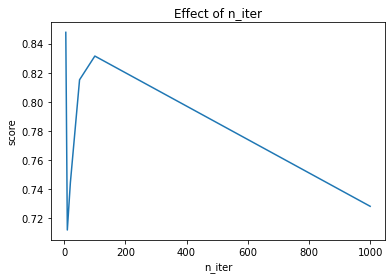

In [17]:
import matplotlib.pyplot as plt
import time

n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss = "log", penalty='l2', max_iter=n_iter)
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))
    
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)

# Linear SVM

In [18]:
from sklearn.linear_model import SGDClassifier
clf1 = SGDClassifier(loss='hinge', penalty="l2")  #penalty - to find absolute value of bits ; l1 and l2
clf1.fit(X_train, Y_train)

SGDClassifier()

In [19]:
Y_pred = clf1.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy: {: .2f}'.format(accuracy_score(Y_test, Y_pred)))

Accuracy:  0.80


C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\yashs\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


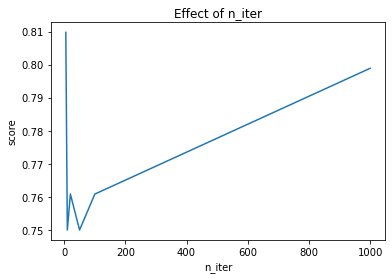

In [21]:
import matplotlib.pyplot as plt
import time

n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss = "hinge", penalty='l2', max_iter=n_iter)
    clf.fit(X_train, Y_train)
    scores.append(clf.score(X_test, Y_test))
    
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)